In [1]:
#dependencies:
#for the data-organizing
from datetime import datetime
import csv
import pandas as pd

#for analysis
import numpy as np
import matplotlib.pyplot as plt

#for graphing:
import plotly.express as px


#for machine learning:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Sample Drupal Log 

In [31]:
data = pd.read_csv("watchdog.csv")

In [32]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='ignore')

In [33]:
data.head()
data.columns.values
data.describe(include='all')

,wid,type,message,variables,severity,link,location,referer,hostname,date,lat,long,ip
count,52.000000,52,52,52,52.000000,0.0,52,52,52,52,52.000000,52.000000,52
unique,NaN,4,8,52,NaN,NaN,4,2,1,21,NaN,NaN,19
top,NaN,system,%module module installed.,"a:1:{s:7:""%module"";s:17:""menu_link_content"";}",NaN,NaN,https://jan11.dd:8443/core/install.php/?_forma...,https://jan11.dd:8443/core/install.php?rewrite...,127.0.0.1,2020-06-02,NaN,NaN,58.5.194.120
freq,NaN,38,33,1,NaN,NaN,32,51,52,3,NaN,NaN,3
mean,26.500000,NaN,NaN,NaN,5.673077,NaN,NaN,NaN,NaN,NaN,39.379442,20.730412,NaN
std,15.154757,NaN,NaN,NaN,0.584813,NaN,NaN,NaN,NaN,NaN,75.117265,30.066059,NaN
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,-102.194349,-37.195497,NaN
25%,13.750000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,-8.465334,-7.964803,NaN
50%,26.500000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,38.248715,22.456314,NaN
75%,39.250000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,112.511900,49.104761,NaN


<AxesSubplot:title={'center':'Number of Severity by Type'}>

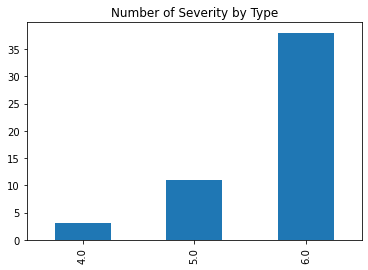

In [16]:
#standard graph
data['severity'].value_counts() #just have this to see the data type
fig = data['severity'].value_counts().plot(kind ="bar", title = "Number of Severity by Type")
fig

In [ ]:
#bar graph of the # of ip numbers
ipDF = pd.DataFrame(data['ip'].value_counts())
ipBar = px.bar(data['ip'].value_counts())
ipBar.update_traces(text = ipDF['ip'], textposition='inside')
ipBar.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
ipBar.update_layout(title_text='Popular IPs')
ipBar.show()


In [28]:
#bar graph of the # of severity types
sampledf = pd.DataFrame(data['severity'].value_counts()) #needed for labels
severBar = px.bar(data['severity'].value_counts())
severBar.update_traces(text = sampledf['severity'], textposition='inside')
severBar.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
severBar.update_layout(title_text='Number of Severity (by Type)')
severBar.show()

#line graph of hits per day
hitsDF = pd.DataFrame(data['date'].value_counts())
hitLine = px.scatter(data['date'].value_counts())
hitLine.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
hitLine.update_layout(title_text='Hits Per Day')
hitLine.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
hitLine.show()